# Assignment - 05 (Multiple Linear Regression)

## Q.1
#### Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

#### R&D Spend -- Research and devolop spend in the past few years
#### Administration -- spend on administration in the past few years
#### Marketing Spend -- spend on Marketing in the past few years
#### State -- states from which data is collected
#### Profit  -- profit of each state in the past few years

In [5]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PRITAM_DATA_SCIENCE_ASSIGNMENT\MY_ASSIGNMENT\PritamAssignment5\Question\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
# No null values
df.isna().sum() 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df.drop("State", axis = 1, inplace=True)
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [11]:
df1=df.rename({'R&D Spend':'RD', 'Marketing Spend' : 'Mrkt', 'Administration' : 'Adms','Profit' : 'Prft'}, axis=1)

In [12]:
# No Duplicates
df1[df1.duplicated()] 

,RD,Adms,Mrkt,Prft


### Correlation_Matrix

In [13]:
# for profit and R&D Spend the value is 0.97, so we can say there is strong correlation between profit and R&D Spend.
df1.corr()

,RD,Adms,Mrkt,Prft
RD,1.000000,0.241955,0.724248,0.972900
Adms,0.241955,1.000000,-0.032154,0.200717
Mrkt,0.724248,-0.032154,1.000000,0.747766
Prft,0.972900,0.200717,0.747766,1.000000


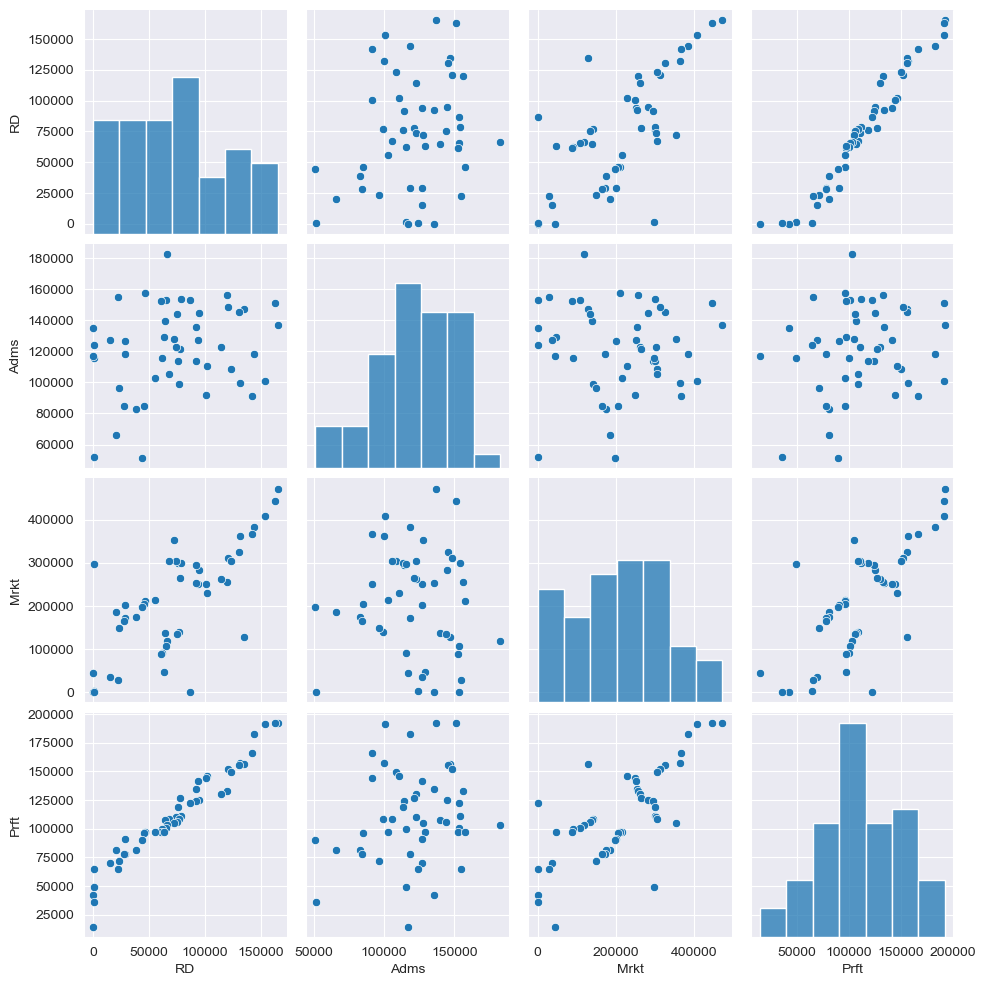

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

### Model Building

In [15]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Prft~RD+Mrkt+Adms',data=df1).fit()

### Model Testing

In [16]:
# Coefficients
model.params

Intercept    50122.192990
RD               0.805715
Mrkt             0.027228
Adms            -0.026816
dtype: float64

In [17]:
# t values and p values:
print("t Values are :\n", model.tvalues,'\n',"p Values are :\n", model.pvalues)
# from below, p values for Adms and Mrkt > 0.05, Hence we build SLR and MLR for variables Adms and Mrkt.

t Values are :
 Intercept     7.626218
RD           17.846374
Mrkt          1.655077
Adms         -0.525507
dtype: float64 
 p Values are :
 Intercept    1.057379e-09
RD           2.634968e-22
Mrkt         1.047168e-01
Adms         6.017551e-01
dtype: float64


In [18]:
# Coefficient of determination: R Squared values
print("R squared value is:\n", model.rsquared,'\n', "R squared_adjacent value is:\n",  model.rsquared_adj)
# R squared adjacent value is = 94.75% , Hence we can say model is really good.

R squared value is:
 0.9507459940683246 
 R squared_adjacent value is:
 0.9475337762901719


### Simple Linear Regression Models:
##### Build SLR and MLR models for insignificant variables 'Adms' and 'Mrkt'  
##### Also find their tvalues and pvalues

In [19]:
ml_p=smf.ols('Prft~Adms',data = df1).fit()  
#t and p-Values
print("T values are:\n", ml_p.tvalues, '\n',"P values are: \n",  ml_p.pvalues)  

T values are:
 Intercept    3.040044
Adms         1.419493
dtype: float64 
 P values are: 
 Intercept    0.003824
Adms         0.162217
dtype: float64


In [20]:
ml_p=smf.ols('Prft~Mrkt',data = df1).fit()  
#t and p-Values
print("T values are:\n", ml_p.tvalues, '\n',"P values are: \n",  ml_p.pvalues)  

T values are:
 Intercept    7.808356
Mrkt         7.802657
dtype: float64 
 P values are: 
 Intercept    4.294735e-10
Mrkt         4.381073e-10
dtype: float64


In [21]:
ml_p=smf.ols('Prft~Adms+Mrkt',data = df1).fit()  
#t and p-Values
print("T values are:\n", ml_p.tvalues, '\n',"P values are: \n",  ml_p.pvalues)  

T values are:
 Intercept    1.142741
Adms         2.467779
Mrkt         8.281039
dtype: float64 
 P values are: 
 Intercept    2.589341e-01
Adms         1.729198e-02
Mrkt         9.727245e-11
dtype: float64


### Calculating VIF

In [22]:
# Exclude one variable and find VIF for each variables.
rsq_RD = smf.ols('RD~Mrkt+Adms', data = df1).fit().rsquared
vif_RD = 1/(1-rsq_RD)
rsq_Mrkt = smf.ols('Mrkt~RD+Adms', data = df1).fit().rsquared
vif_Mrkt = 1/ (1-rsq_Mrkt)
rsq_Adms = smf.ols('Adms~Mrkt+RD', data = df1).fit().rsquared
vif_Adms = 1/(1-rsq_Adms)

d = {'Variable': ['RD','Mrkt','Adms'], 'VIF': [vif_RD,vif_Mrkt,vif_Adms]}
d1 = pd.DataFrame(d)
print(d1)

  Variable       VIF
0       RD  2.468903
1     Mrkt  2.326773
2     Adms  1.175091


In [23]:
#VIF of all the variables < 20 , No collinearity.

### Residual Analysis
##### Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

In [24]:
model = smf.ols('Prft~Mrkt+RD+Adms', data = df1).fit()

In [25]:
import statsmodels.api as sm

In [26]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q Plot of residuals")

Text(0.5, 1.0, 'Normal Q-Q Plot of residuals')

In [27]:
list(np.where(model.resid<-30000))
# outlier value exists below -3000 so that we use (model.resid<-30000)

[array([49], dtype=int64)]

In [28]:
# Residual plot for Homoscedasticity or Heteroscedasticity

In [29]:
model = smf.ols('Prft~Mrkt+RD+Adms', data = df1).fit()

In [30]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()
#get_standardized_values(df1)

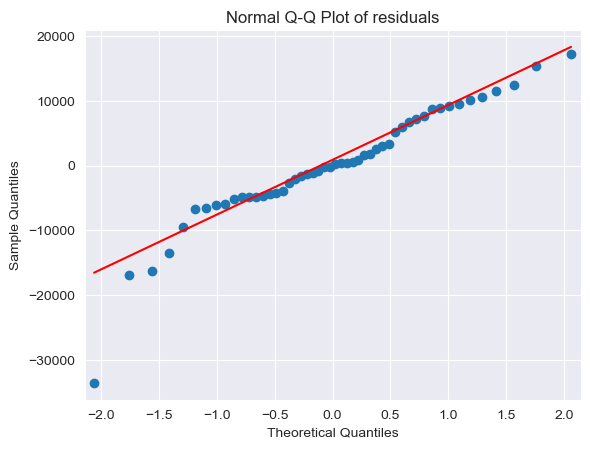

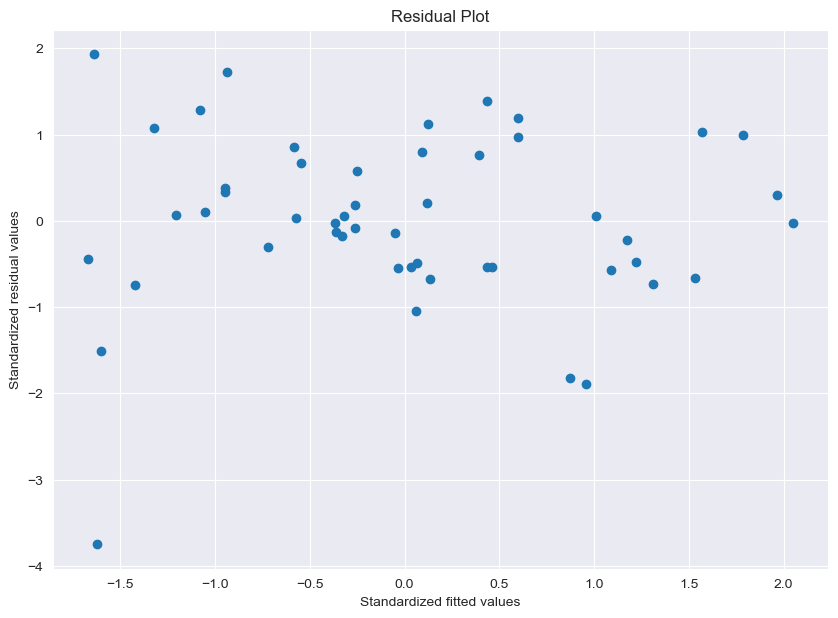

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

### Residual Vs Regressors

eval_env: 1


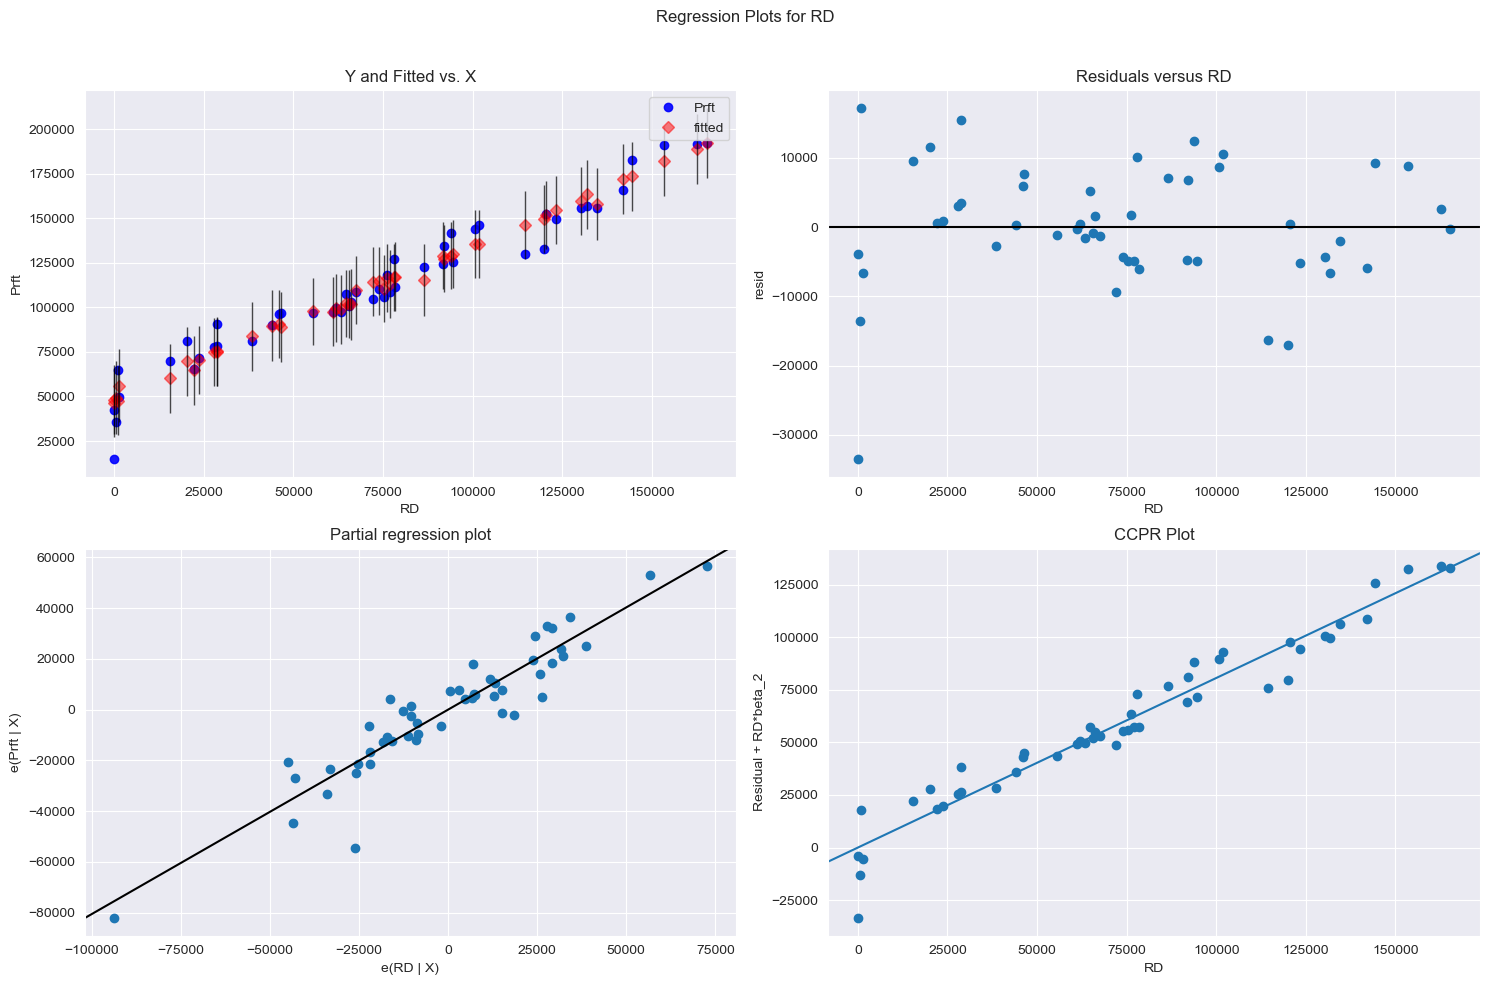

In [32]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"RD", fig = fig)
plt.show()

eval_env: 1


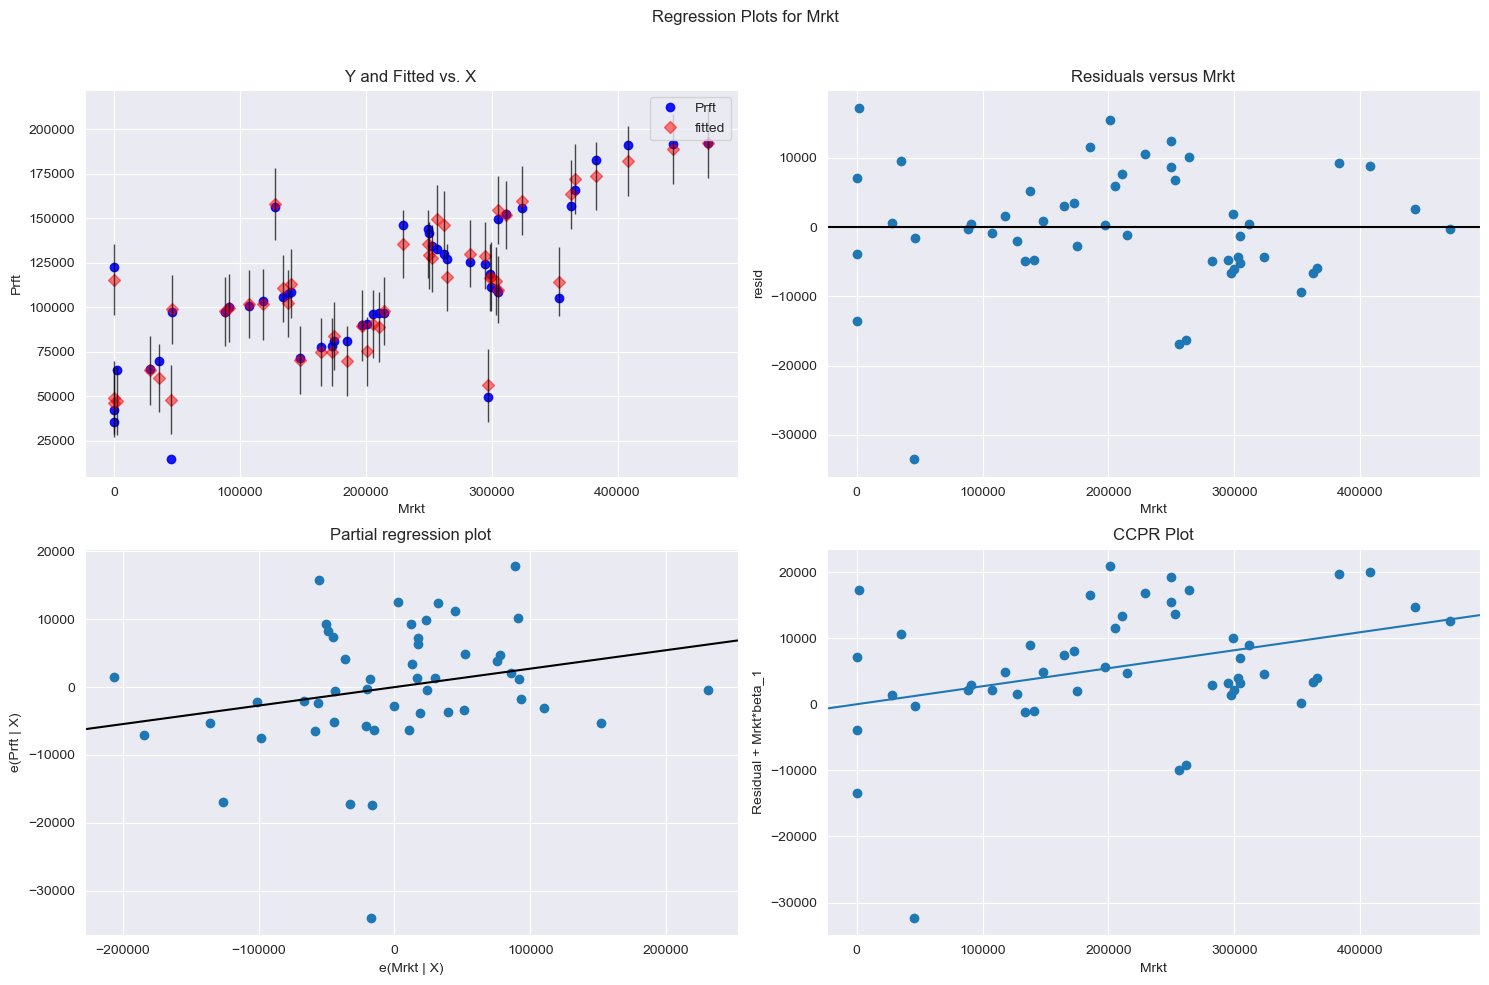

In [33]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model, "Mrkt", fig = fig)
plt.show()

eval_env: 1


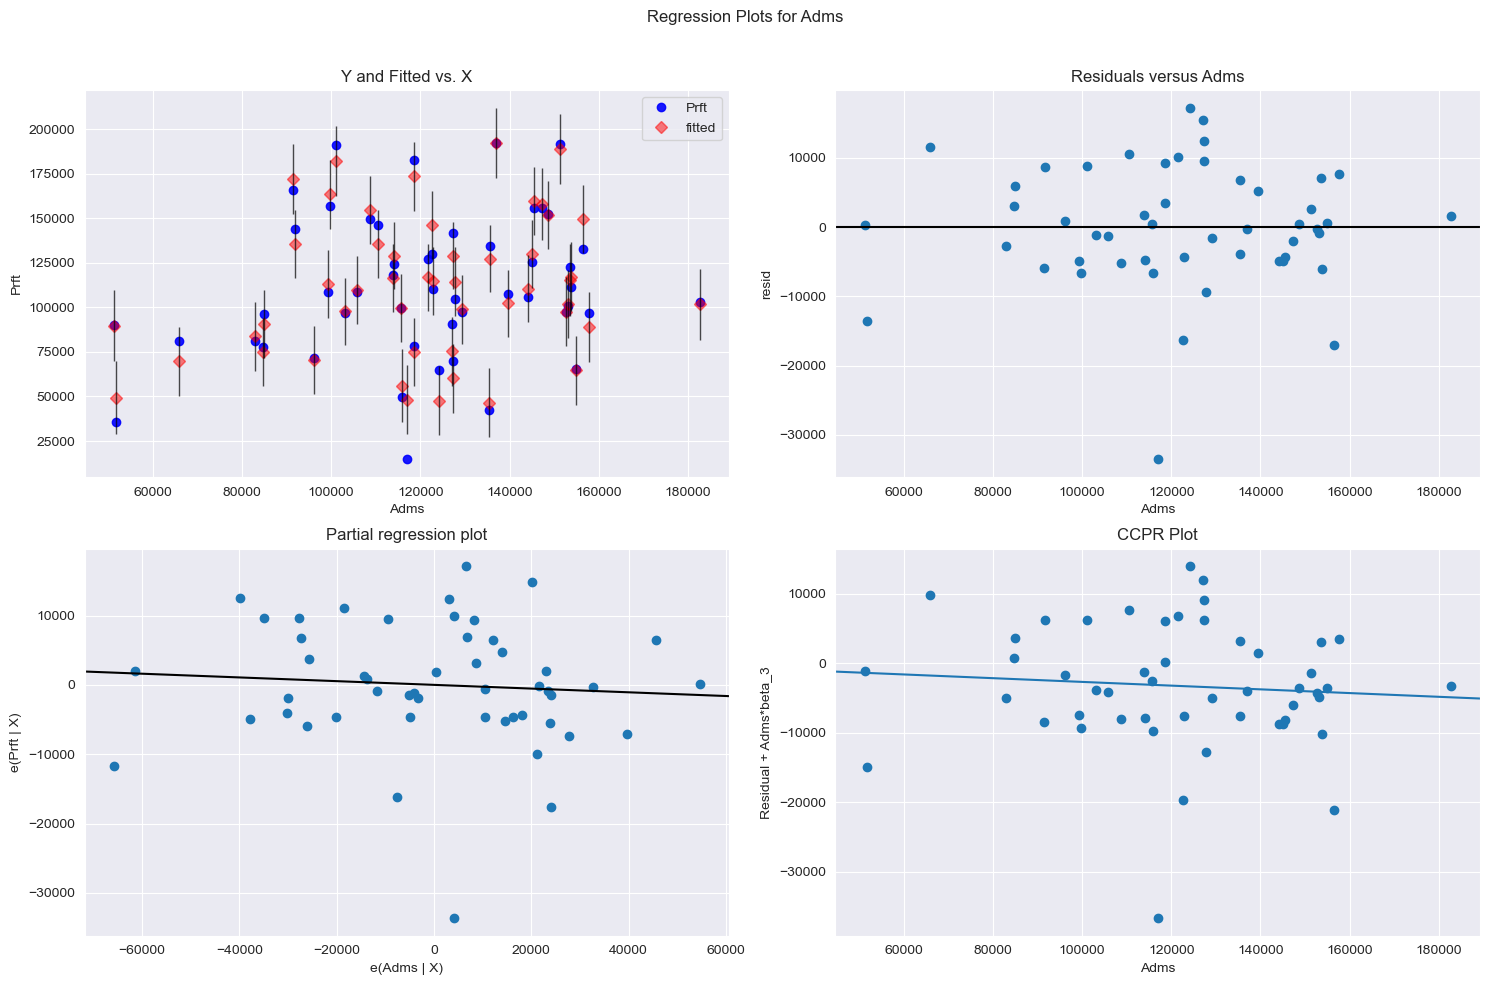

In [34]:
fig = plt.figure(figsize = (15,10))
fig =  sm.graphics.plot_regress_exog(model, "Adms", fig = fig) 
plt.show()

### Cook's Distance

In [35]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

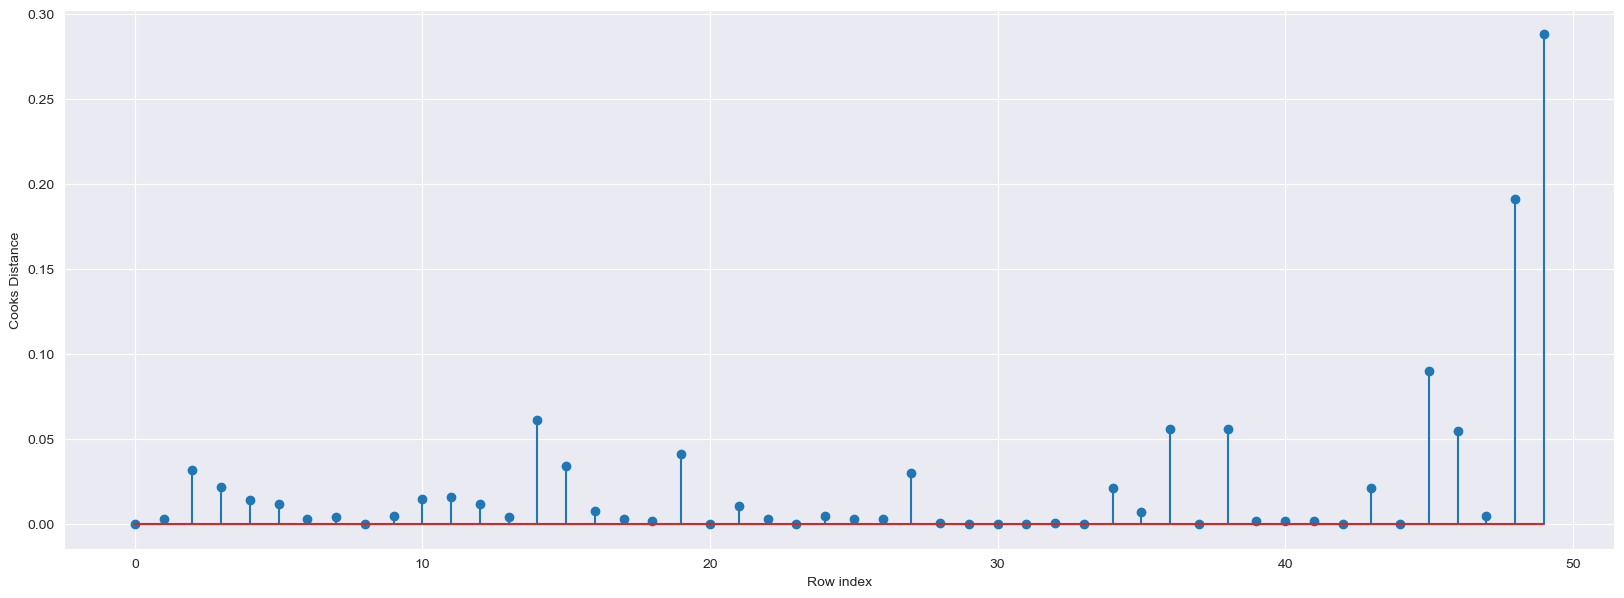

In [36]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

In [38]:
df1.shape

(50, 4)

In [39]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

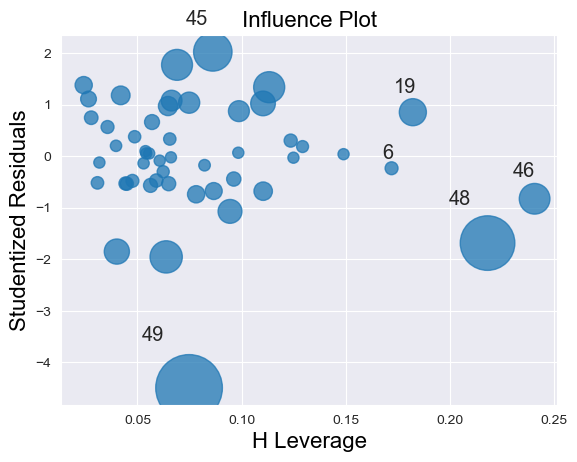

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

#y=[i for i in range(-2,8)]
#x=[leverage_cutoff for i in range(10)]
#plt.plot(x,y,'r+')
plt.show()

# From the above plot, Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

In [41]:
df1[df1.index.isin([49])]

,RD,Adms,Mrkt,Prft
49,0.0,116983.8,45173.06,14681.4


In [42]:
df2=df1.drop(df1.index[49], axis=0).reset_index()
df2.drop(['index'], axis=1, inplace=True)
#df2

### Build Model

In [43]:
#Exclude variable "Mrkt" and generate R-Squared and AIC values
final_Adms = smf.ols('Prft~RD+Adms',data = df2).fit()

In [44]:
(final_Adms.rsquared, final_Adms.aic, final_Adms.bic)

(0.9584519070123048, 1022.0654576388338, 1027.7409185331658)

In [45]:
#Exclude variable "Adms" and generate R-Squared and AIC values
final_Mrkt= smf.ols('Prft~RD+Mrkt',data = df2).fit()

In [46]:
(final_Mrkt.rsquared, final_Mrkt.aic, final_Mrkt.bic)

(0.9610856807456628, 1018.8564801588338, 1024.5319410531658)

In [47]:
# Comparing above R-Squared and AIC values, model 'final_Mrkt' has high R- square and low AIC value 
# Hence include variable 'Mrkt' so that multi collinearity problem would be resolved.

### Cook's Distance

In [48]:
model_influence_Mrkt = final_Mrkt.get_influence()
(c_M, _) = model_influence_Mrkt.cooks_distance

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_M,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

Text(0, 0.5, 'Cooks Distance')

In [50]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [51]:
#Check the accuracy of the model
final_Mrkt= smf.ols('Prft~RD+Mrkt+Adms',data = df2).fit()

In [52]:
final_Mrkt.rsquared, final_Mrkt.aic

(0.9613162435129847, 1020.5652974526367)

In [53]:
# Model Prediction for new dataset
# New data for prediction
new_data=pd.DataFrame({"Mrkt":250000,"RD":200000,"Adms":350000},index=[1])
new_data

,Mrkt,RD,Adms
1,250000,200000,350000


In [54]:
final_Mrkt.predict(new_data)

1    207520.741579
dtype: float64

In [55]:
final_Mrkt.predict(df2.iloc[0:4,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
dtype: float64

In [56]:
pred_y = final_Mrkt.predict(df2)

In [57]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

### Table containing R^2 value for each prepared model

In [58]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_Mrkt.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


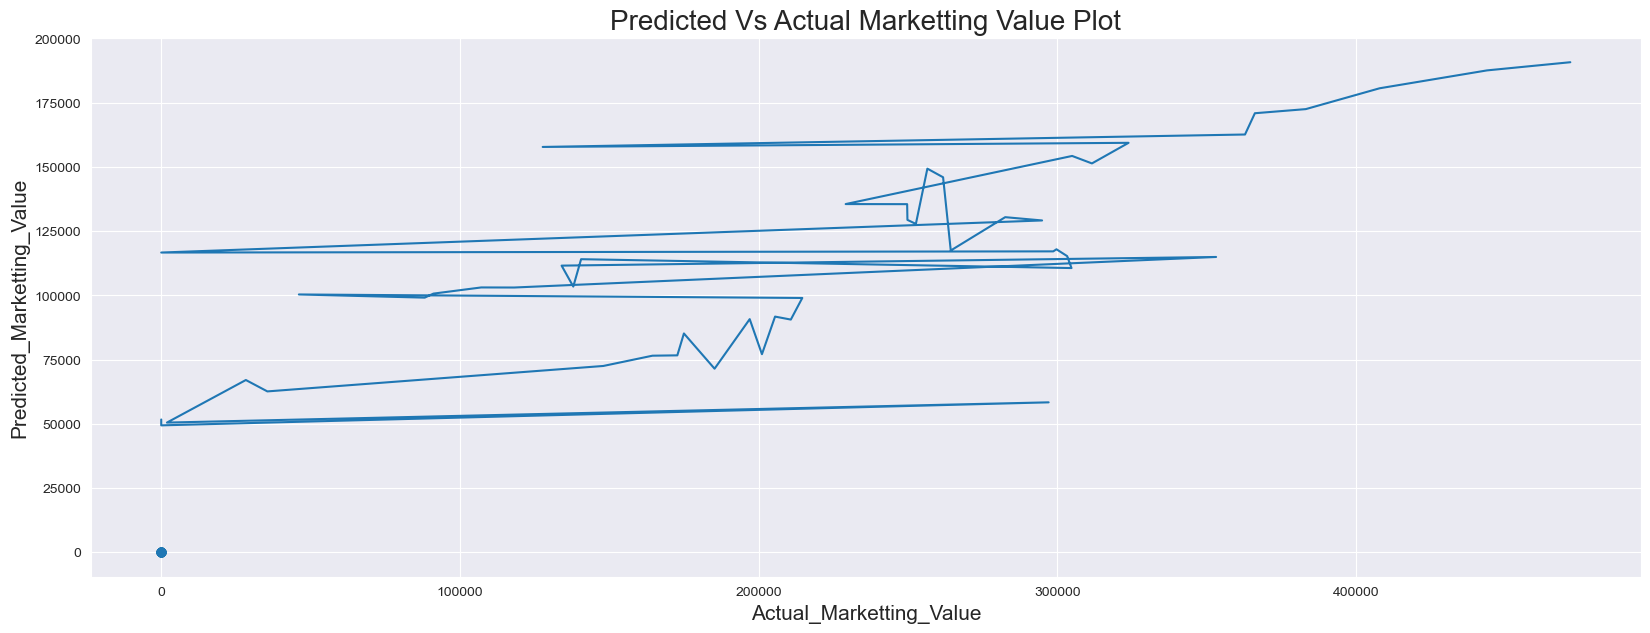

In [59]:
# Graph shows relation between Predicted and actual value
import matplotlib.pyplot as plt
df2.Mrkt # Actual Value
pred_y   # Predicted Value
plt.plot(df2.Mrkt,pred_y); plt.xlabel("Actual_Marketting_Value",size=15); plt.ylabel("Predicted_Marketting_Value",size = 15)
plt.title("Predicted Vs Actual Marketting Value Plot", size=20)
plt.show()

## Q.2
#### Consider only the below columns and prepare a prediction model for predicting Price.

#### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [60]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [61]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PRITAM_DATA_SCIENCE_ASSIGNMENT\MY_ASSIGNMENT\PritamAssignment5\Question\ToyotaCorolla.csv", encoding="ISO-8859-1")
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### EDA

In [62]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [63]:
print(df.Doors.unique())
print(df.Gears.unique())
print(df.HP.unique())
print(df.cc.unique())
print(df.Quarterly_Tax.unique())
print(df.Weight.unique())
print(df.Age_08_04.unique())

[3 5 4 2]
[5 6 3 4]
[ 90 192  69 110  97  71 116  98  86  72 107  73]
[ 2000  1800  1900  1600  1400  1598 16000  1995  1398  1300  1587  1975
  1332]
[210 100 185  85  19 234  69 283  64 197 163  72  40]
[1165 1170 1245 1185 1105 1065 1120 1100 1255 1270 1110 1195 1180 1075
 1130 1275 1060 1115 1265 1260 1125 1155 1045 1480 1320 1280 1135 1090
 1150 1085 1160 1205 1084 1140 1095 1025 1119 1080 1121 1615 1067 1040
 1030 1055 1050 1103 1070 1035 1015 1000 1078 1079 1109 1020 1010 1114
 1172 1094 1083]
[23 24 26 30 32 27 25 22 31 28 29 20 19 16 17 11 18 13 14  4  8  7 15 10
 12  9  6  2  1 43 38 40 44 41 37 39 42 35 34 33 36 53 51 54 45 55 48 52
 49 56 50 47 46 58 68 59 62 65 67 64 60 61 66 57 63 73 79 78 74 77 69 80
 76 70 71 75 72]


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [65]:
PR=df.iloc[:,2]
Age = df.iloc[:,3]
KM = df.iloc[:,6]
HP = df.iloc[:,8]
CC = df.iloc[:,12]
Drs = df.iloc[:,13]
Grs = df.iloc[:,15]
QT = df.iloc[:,16]
WT = df.iloc[:,17]
df1 = pd.DataFrame({"Price":PR,"Age":Age,"KM":KM,"HP":HP,"CC":CC,"Drs":Drs,"Grs":Grs,"QT":QT,"WT":WT})
df1

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Drs     1436 non-null   int64
 6   Grs     1436 non-null   int64
 7   QT      1436 non-null   int64
 8   WT      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [67]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
113,24950,8,13253,116,2000,5,5,234,1320


### Correlation Matrix

In [68]:
df1.corr()

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Drs,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Grs,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [71]:
sns.set_style(style="darkgrid")
sns.pairplot(df1)

### Model Building

In [70]:
# Build Model
model = smf.ols("Price~Age+KM+HP+CC+Drs+Grs+QT+WT", data = df1).fit()

In [72]:
# Coefficients
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Drs            -1.616641
Grs           594.319936
QT              3.949081
WT             16.958632
dtype: float64

In [73]:
# t values and p values:
model.tvalues, model.pvalues
# from below, p values for CC and Drs > 0.05, Hence we build SLR and MLR for variables CC and Drs.

(Intercept    -3.948666
 Age         -46.511852
 KM          -16.621622
 HP           11.241018
 CC           -1.344222
 Drs          -0.040410
 Grs           3.016007
 QT            3.014535
 WT           15.879803
 dtype: float64,
 Intercept     8.241949e-05
 Age          3.354724e-288
 KM            7.538439e-57
 HP            3.757218e-28
 CC            1.790902e-01
 Drs           9.677716e-01
 Grs           2.606549e-03
 QT            2.619148e-03
 WT            2.048576e-52
 dtype: float64)

In [74]:
# Coefficient of determination: R Squared values
model.rsquared, model.rsquared_adj
# R squared adjacent value is = 0.86% , Hence we can say model is good.

(0.8637627463428192, 0.8629989775766963)

### Simple Linear Regression Models:
##### Build SLR and MLR models for insignificant variables 'CC' and 'Drs'
##### Also find their tvalues and pvalues

In [75]:
ml_CC = smf.ols("Price~CC", data=df1).fit()
ml_CC.tvalues, ml_CC.pvalues

(Intercept    24.694090
 CC            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 CC            1.550808e-06
 dtype: float64)

In [76]:
ml_Drs = smf.ols("Price~Drs", data = df1).fit()
ml_Drs.tvalues, ml_Drs.pvalues

(Intercept    19.258097
 Drs           7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Drs          1.461237e-12
 dtype: float64)

In [77]:
ml_DC = smf.ols("Price~Drs+CC", data = df1).fit()
ml_DC.tvalues, ml_DC.pvalues

(Intercept    12.620704
 Drs           6.816153
 CC            4.340400
 dtype: float64,
 Intercept    1.056885e-34
 Drs          1.373469e-11
 CC           1.521992e-05
 dtype: float64)

### Calculate VIF

In [78]:
rsq_Age = smf.ols('Age~KM+HP+CC+Drs+Grs+QT+WT', data = df1).fit().rsquared
vif_Age = 1/(1-rsq_Age)
rsq_KM = smf.ols('KM~HP+CC+Drs+Grs+QT+WT+Age', data = df1).fit().rsquared
vif_KM = 1/ (1-rsq_KM)
rsq_HP = smf.ols('HP~CC+Drs+Grs+QT+WT+Age+KM', data = df1).fit().rsquared
vif_HP = 1/(1-rsq_HP)
rsq_CC = smf.ols('CC~Drs+Grs+QT+WT+Age+KM+HP', data = df1).fit().rsquared
vif_CC = 1/(1-rsq_CC)
rsq_Drs = smf.ols('Drs~Grs+QT+WT+Age+KM+HP+CC', data = df1).fit().rsquared
vif_Drs = 1/ (1-rsq_Drs)
rsq_Grs = smf.ols('Grs~QT+WT+Age+KM+HP+CC+Drs', data = df1).fit().rsquared
vif_Grs = 1/(1-rsq_Grs)
rsq_QT = smf.ols('QT~WT+Age+KM+HP+CC+Drs+Grs', data = df1).fit().rsquared
vif_QT = 1/(1-rsq_QT)
rsq_WT = smf.ols('WT~Age+KM+HP+CC+Drs+Grs+QT', data = df1).fit().rsquared
vif_WT = 1/ (1-rsq_WT)



d = {'Variables': ['Age','KM','HP','CC','Drs','Grs','QT','WT'], 'VIF': [vif_Age,vif_KM,vif_HP,vif_CC,vif_Drs,vif_Grs,vif_QT,vif_WT]}
d1 = pd.DataFrame(d)
print(d1)

  Variables       VIF
0       Age  1.884620
1        KM  1.756905
2        HP  1.419422
3        CC  1.163894
4       Drs  1.156575
5       Grs  1.098723
6        QT  2.311431
7        WT  2.516420


In [79]:
#VIF of all the variables < 20 , No collinearity.

### Residual Analysis
##### Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

In [80]:
model = smf.ols("Price~Age+KM+HP+CC+Drs+Grs+QT+WT", data = df1).fit()

In [81]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q Plot of residual")

Text(0.5, 1.0, 'Normal Q-Q Plot of residual')

In [82]:
import numpy as np
print(list(np.where(model.resid<-7000))) # outlier value exists below -7000 so that we use (model.resid<-70000)
print(list(np.where(model.resid>5000)))  # outlier value exists below 5000 so that we use (model.resid>50000)

[array([221, 601], dtype=int64)]
[array([109, 147, 523], dtype=int64)]


In [83]:
# Residual plot for Homoscedasticity or Heteroscedasticity

In [84]:
model = smf.ols("Price~Age+KM+HP+CC+Drs+Grs+QT+WT", data = df1).fit()

In [85]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()
#get_standardized_values(df1)

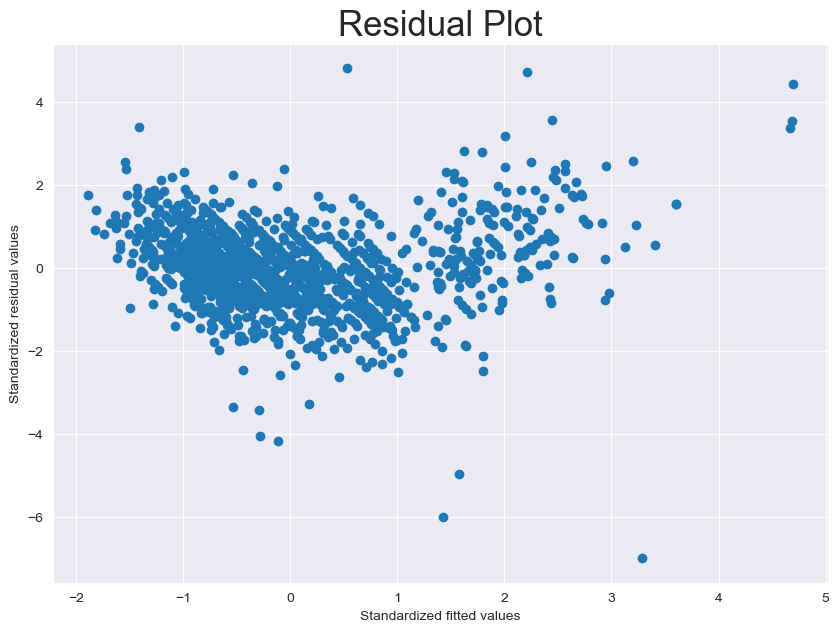

In [87]:
plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot", size=25)
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

### Residual Vs Regressors

eval_env: 1


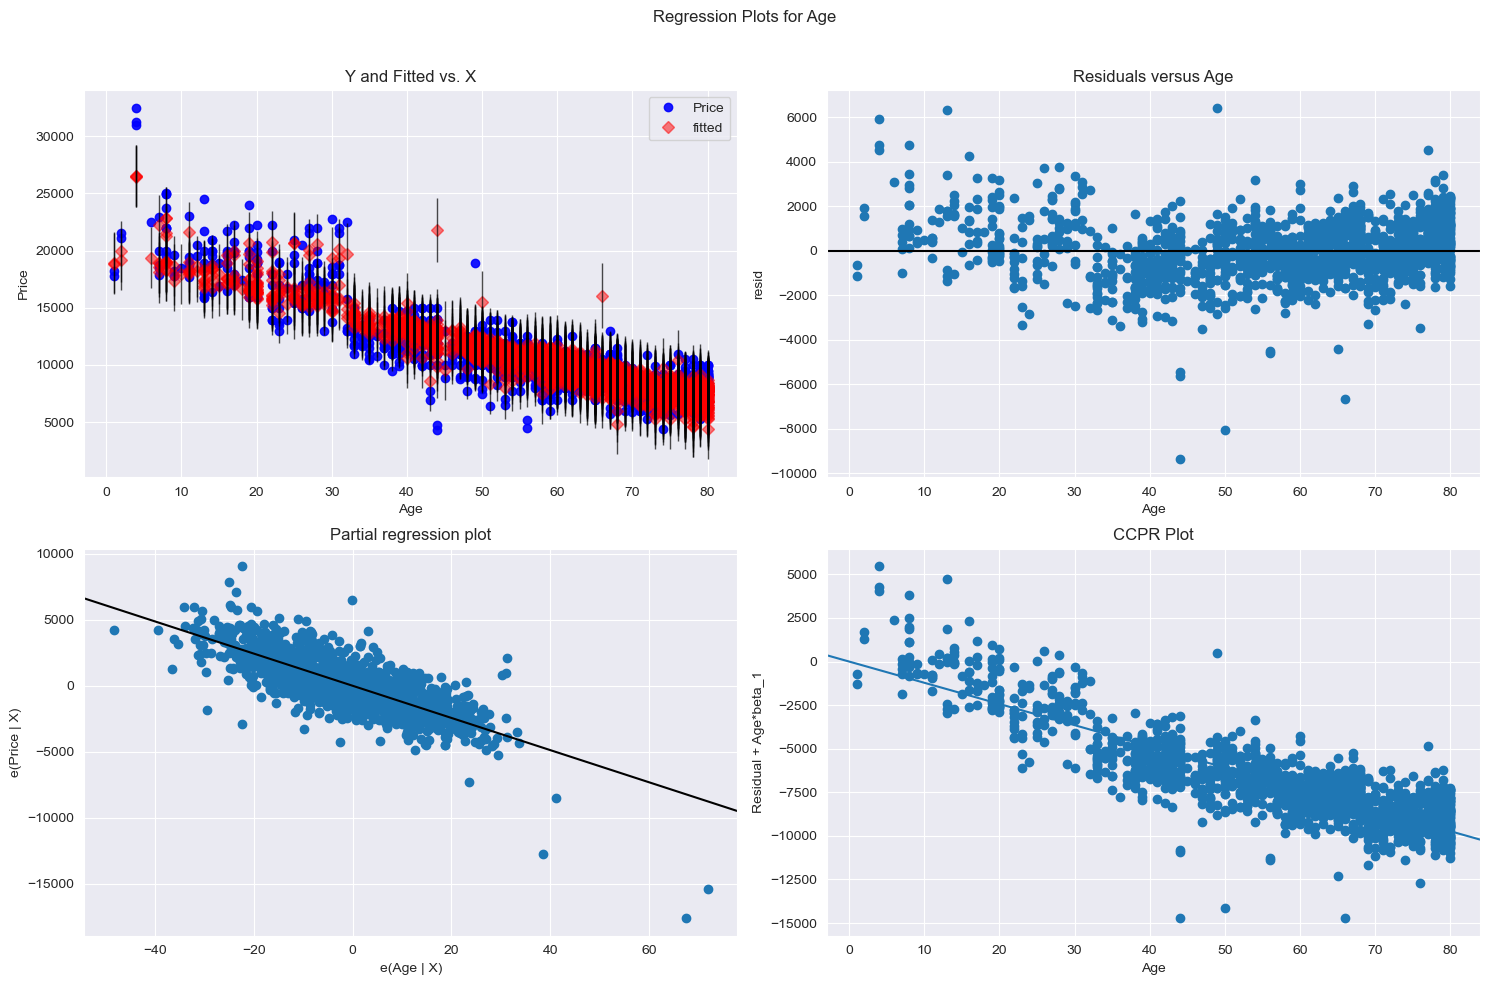

In [88]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Age", fig = fig)
plt.show()

eval_env: 1


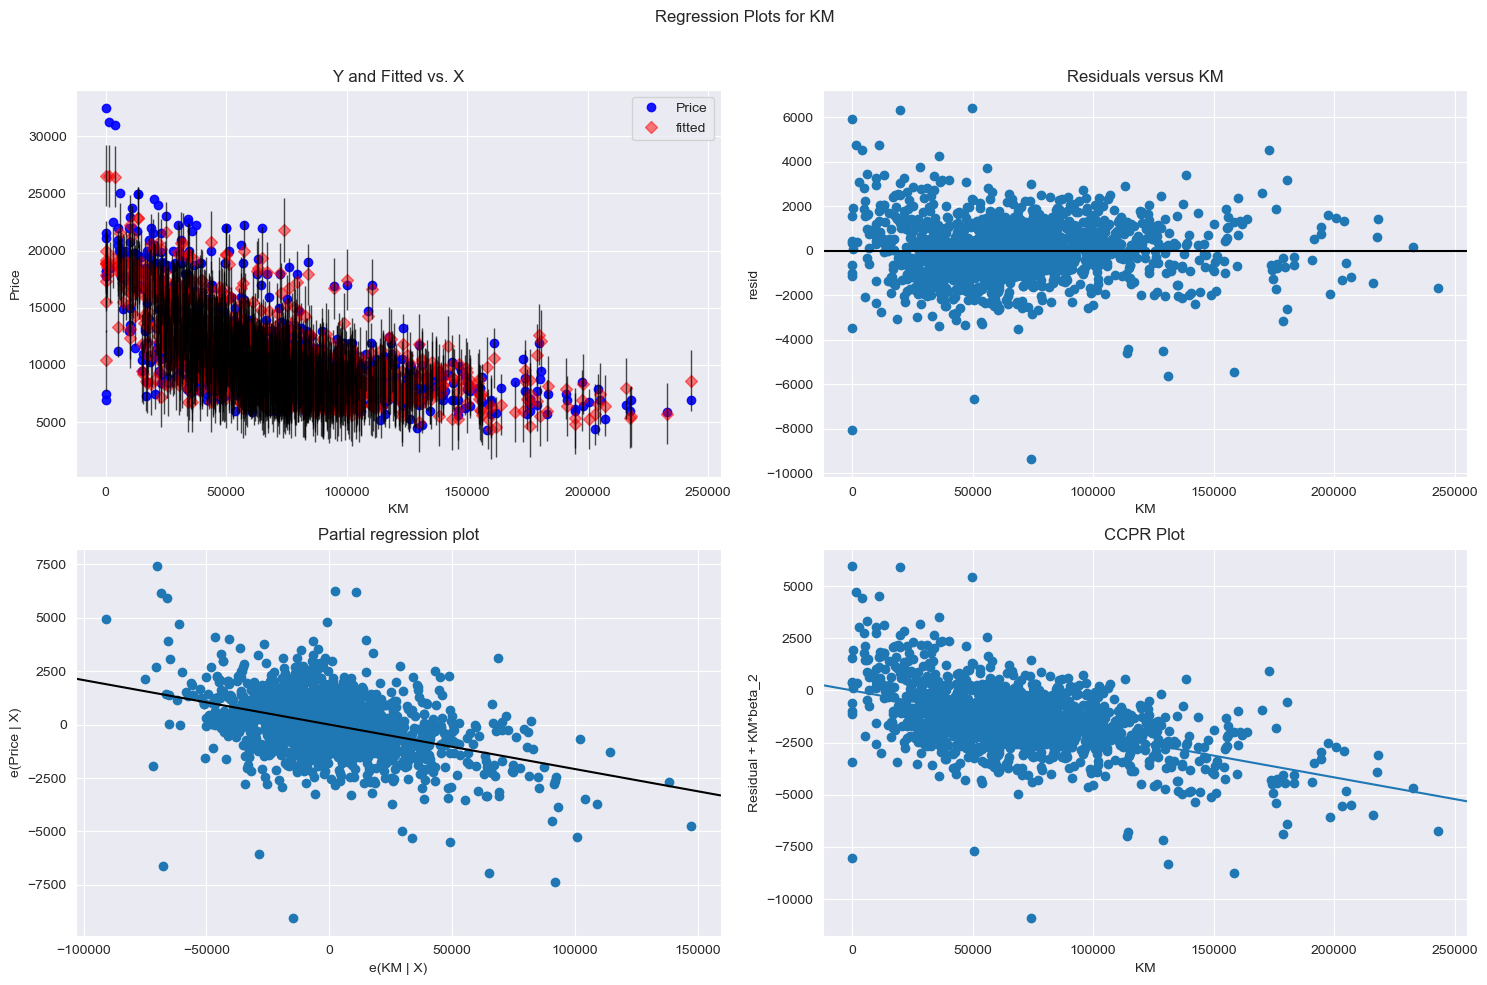

In [89]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"KM", fig = fig)
plt.show()

eval_env: 1


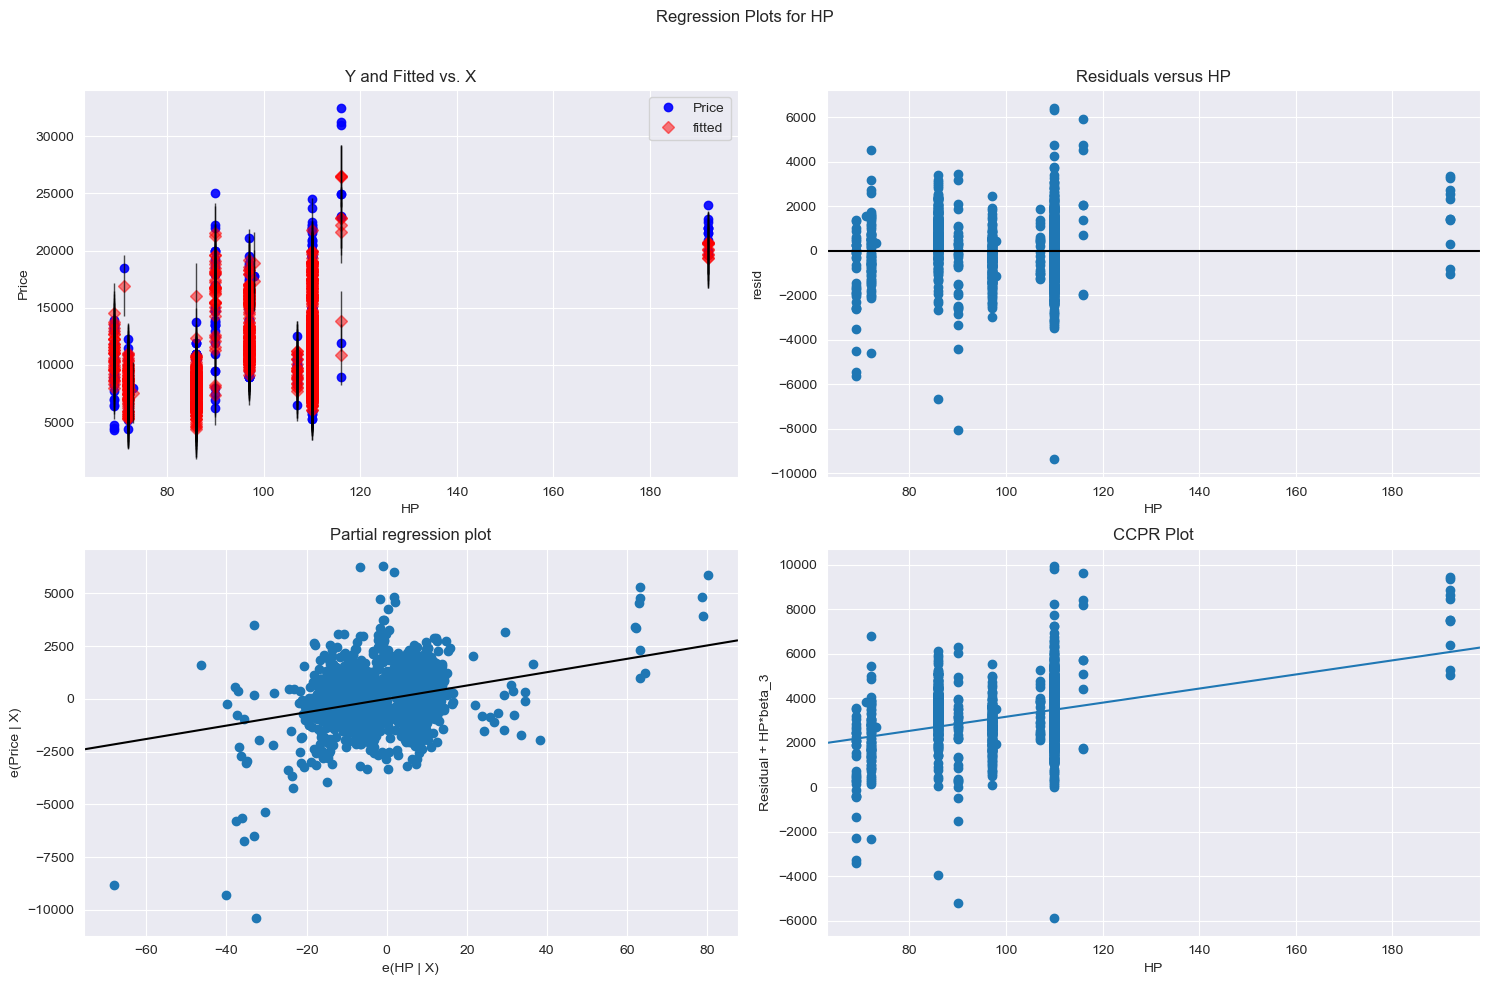

In [90]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"HP", fig = fig)
plt.show()

eval_env: 1


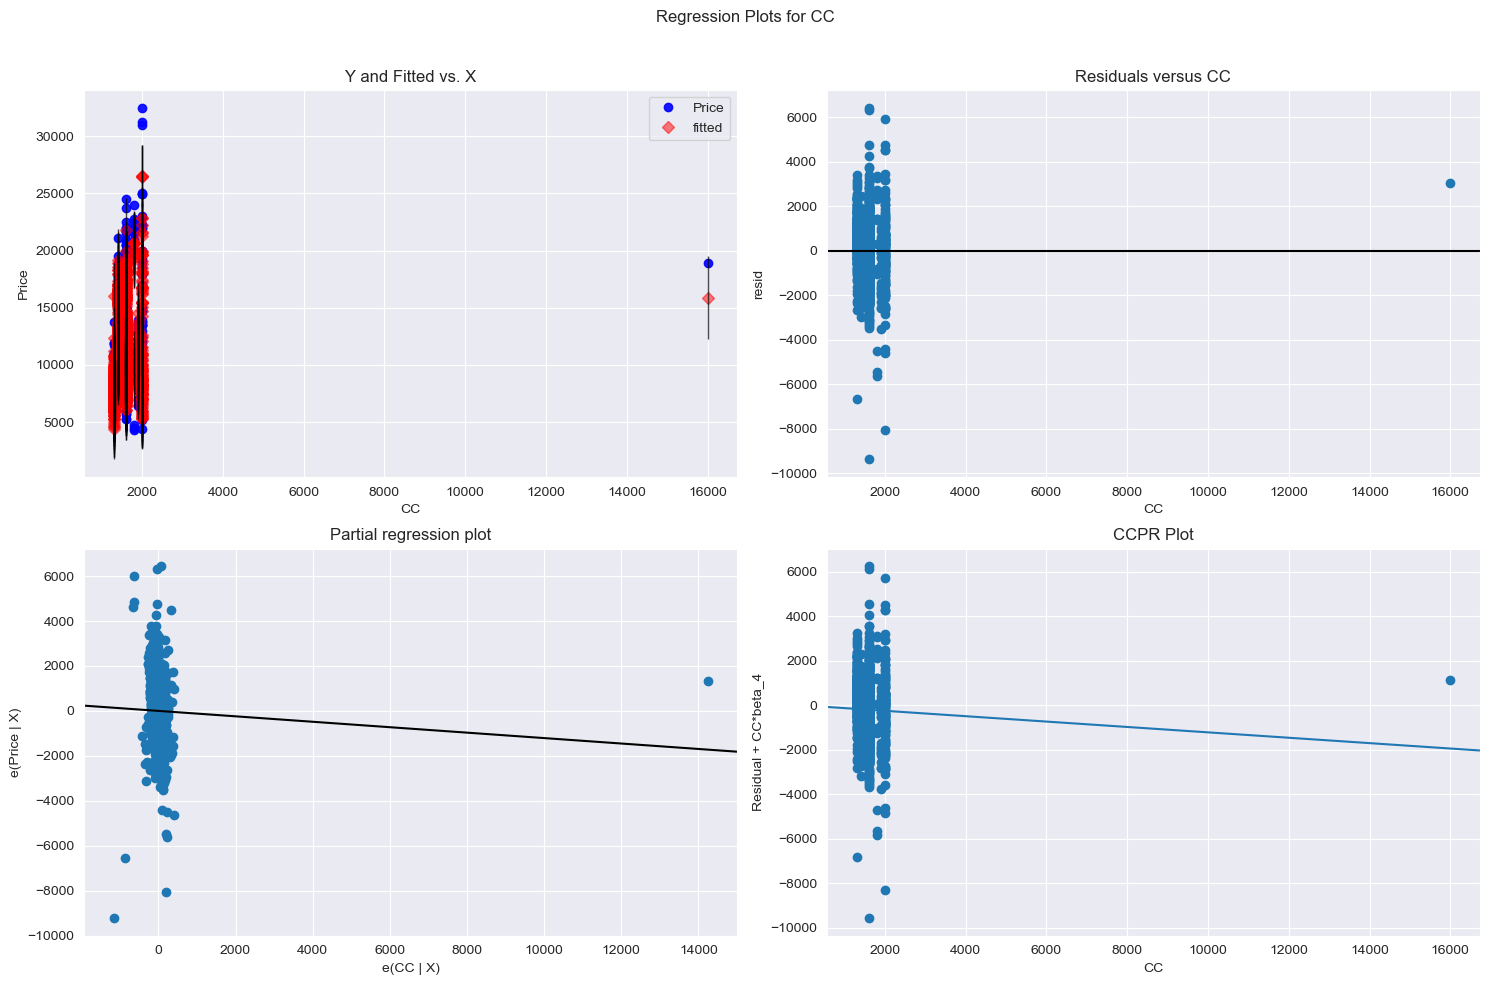

In [91]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"CC", fig = fig)
plt.show()

eval_env: 1


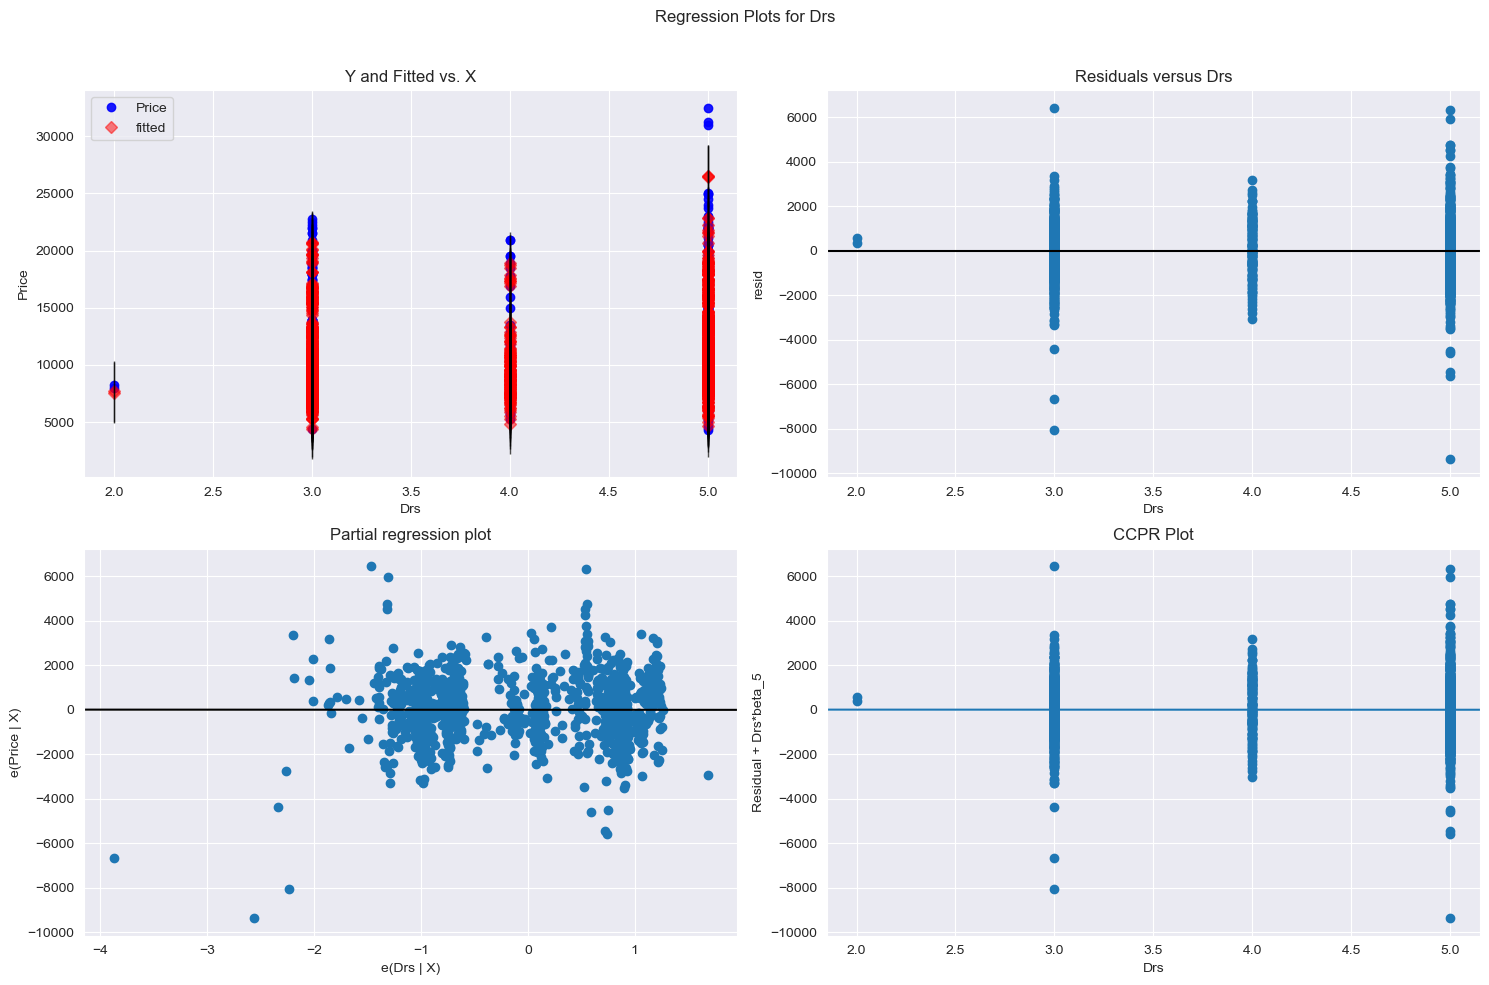

In [92]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Drs", fig = fig)
plt.show()

eval_env: 1


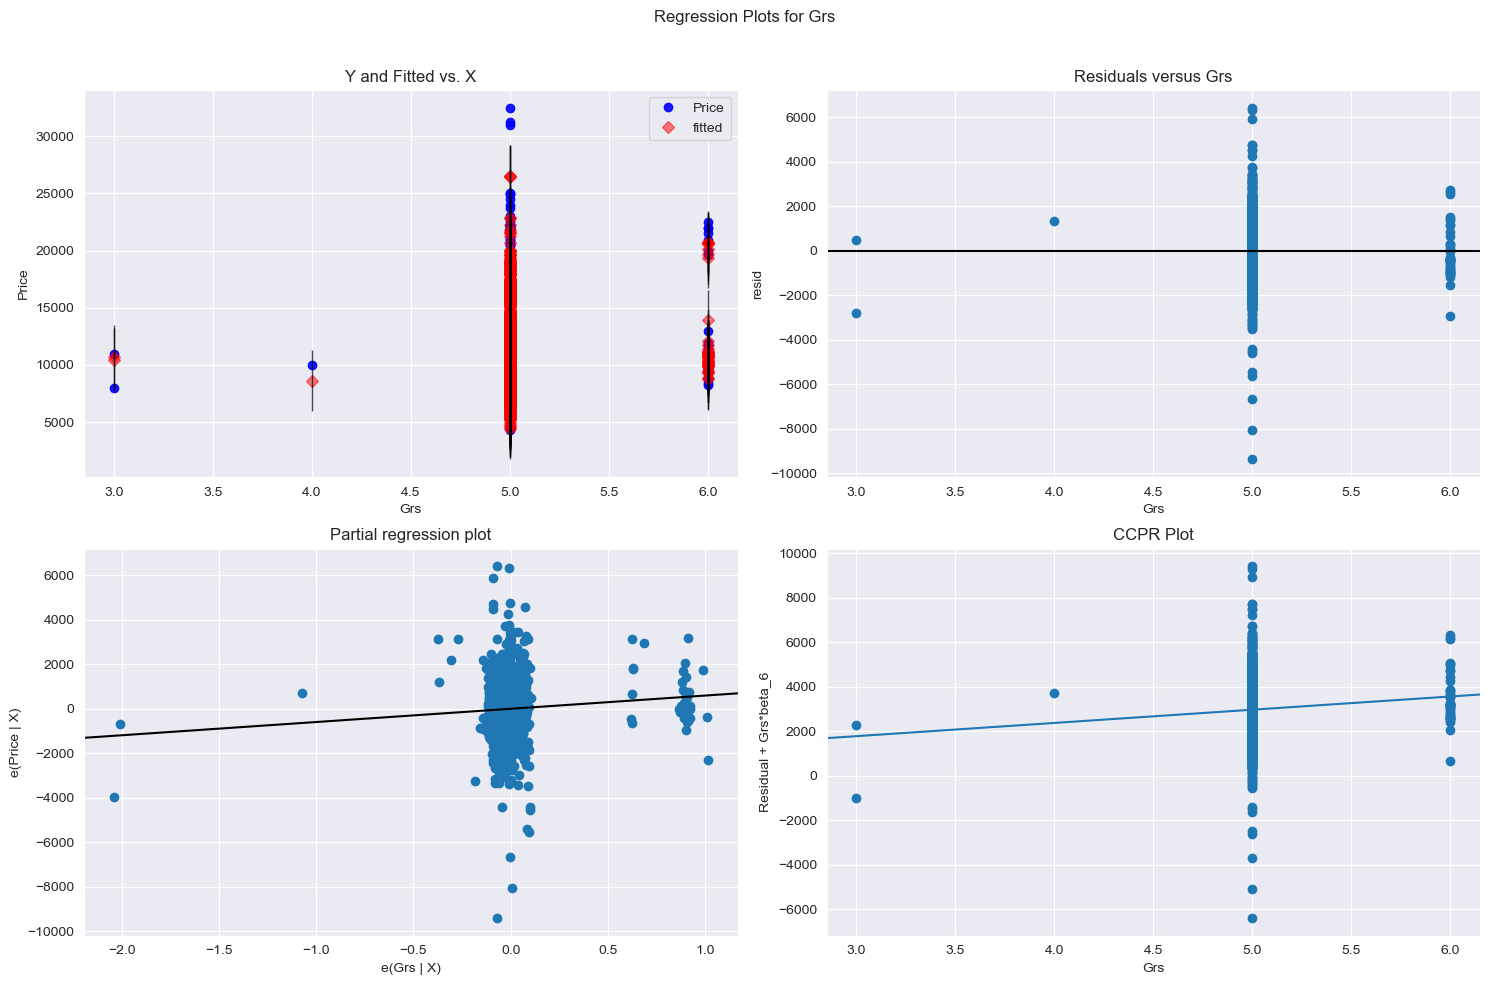

In [93]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Grs", fig = fig)
plt.show()

eval_env: 1


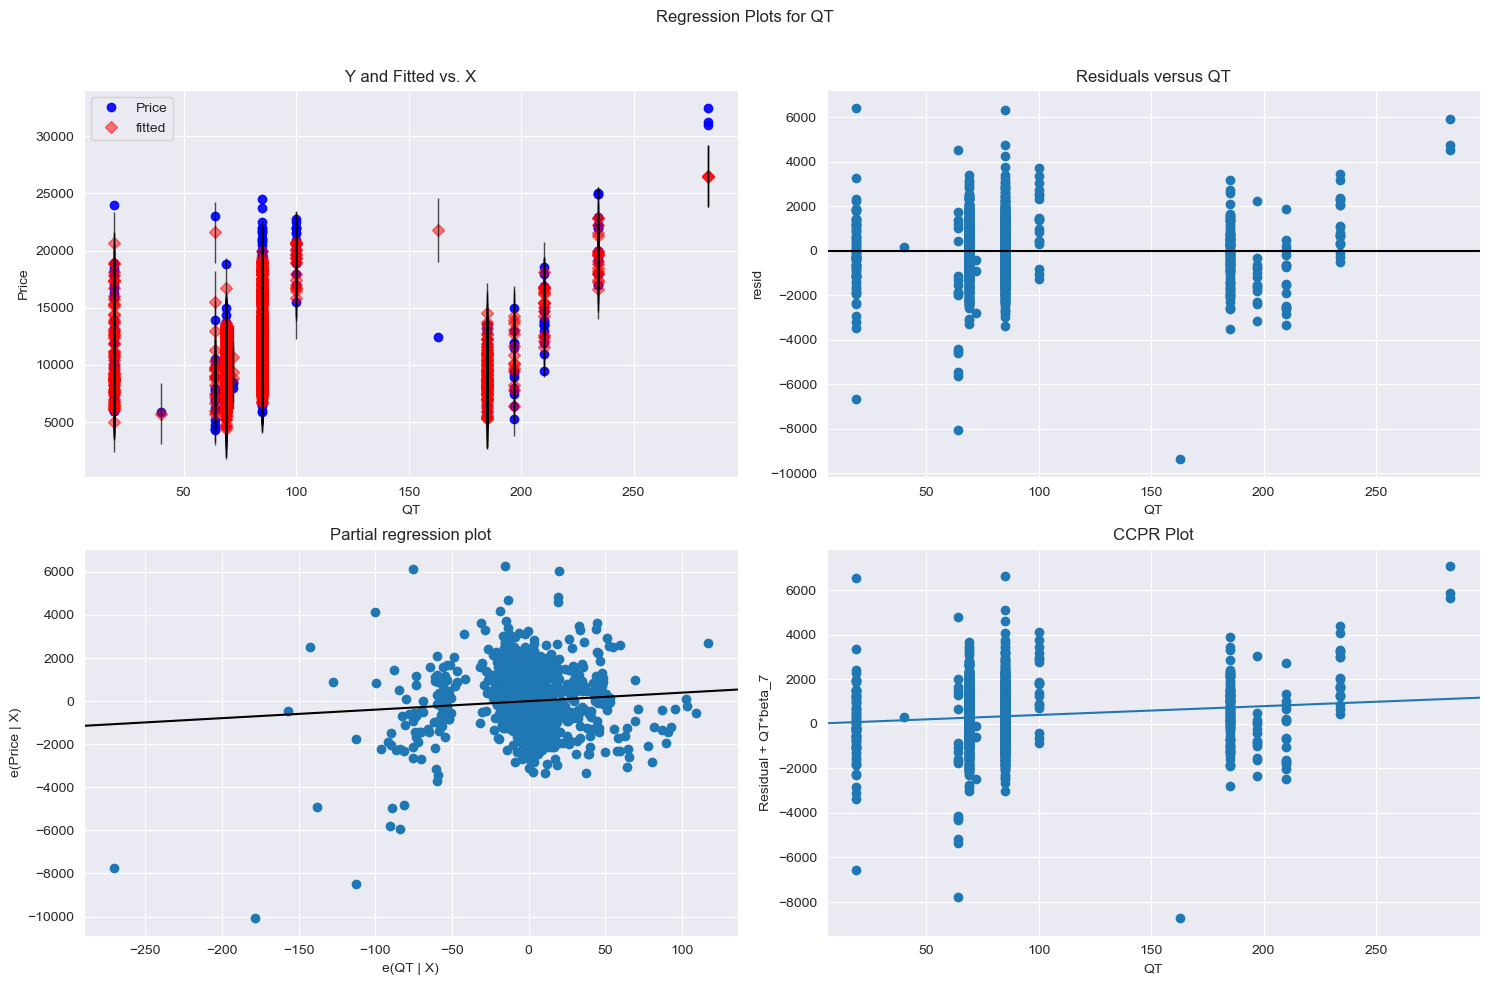

In [94]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"QT", fig = fig)
plt.show()

eval_env: 1


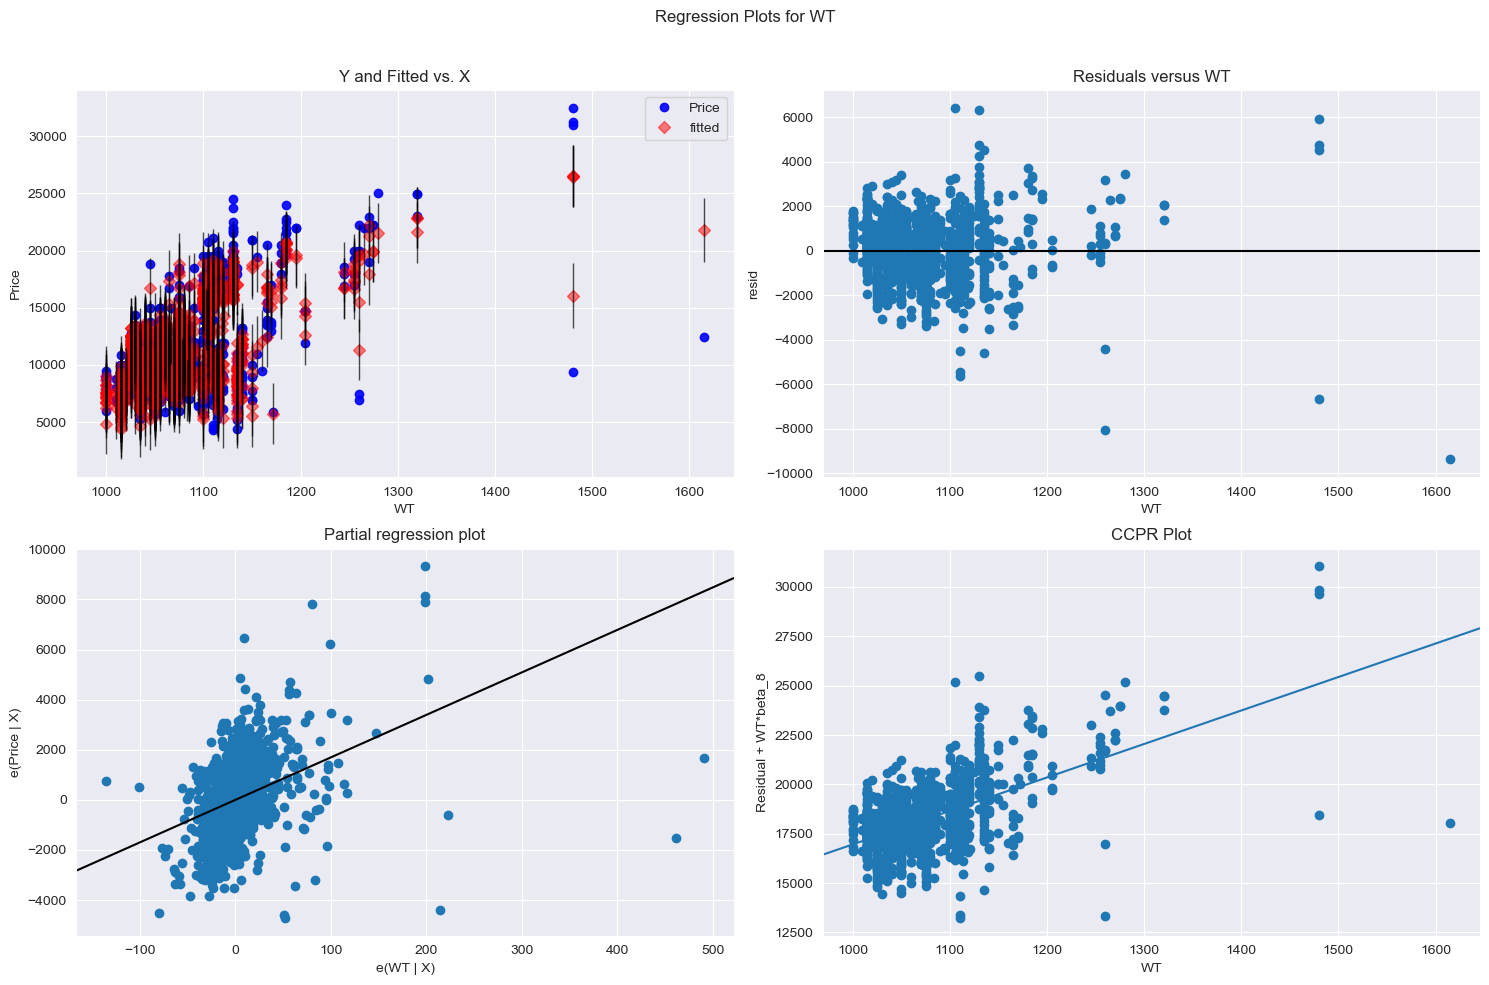

In [95]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"WT", fig = fig)
plt.show()

### Cook's Distance

In [96]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence_CC = model.get_influence()
(c_, _) = model_influence_CC.cooks_distance

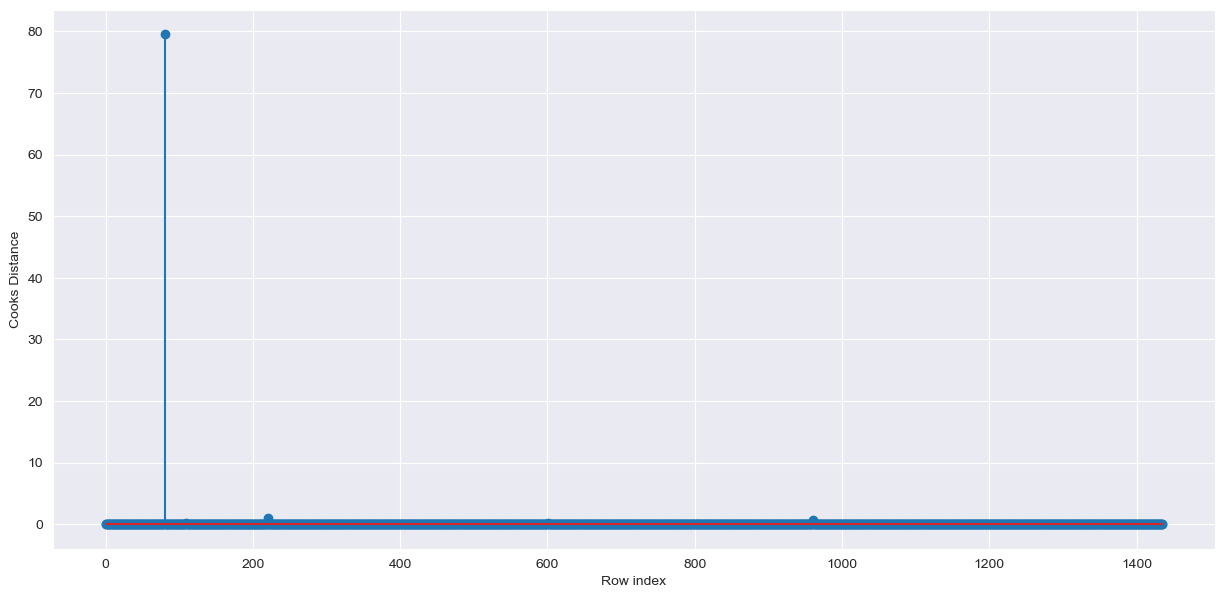

In [97]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(df1)), np.round(c_, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [98]:
#index and value of influencer where c is more than .5
(np.argmax(c_),np.max(c_))

(80, 79.52010624138055)

In [99]:
df1.shape

(1436, 9)

In [100]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [101]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [102]:
df1[df1.index.isin([80])]

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


In [103]:
df2=df1.drop(df1.index[80], axis=0).reset_index()
df2.drop(['index'], axis=1, inplace=True)
df2

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


### Build Model

In [104]:
#Exclude variable "CC" and generate R-Squared and AIC values
final_Drs = smf.ols('Price~Age+KM+HP+Drs+Grs+QT+WT',data = df2).fit()

In [105]:
(final_Drs.rsquared, final_Drs.aic, final_Drs.bic)


(0.8631959819380925, 24751.649416173997, 24793.800777199547)

In [106]:
#Exclude variable "Drs" and generate R-Squared and AIC values
final_CC = smf.ols('Price~Age+KM+HP+CC+Grs+QT+WT',data = df2).fit()

In [107]:
(final_CC.rsquared, final_CC.aic, final_CC.bic)

(0.8693349475698542, 24685.765438793034, 24727.916799818584)

In [108]:
# Comparing above R-Squared and AIC values, model 'final_CC' has high R- square and low AIC value 
# hence include variable 'CC' so that multi collinearity problem would be resolved.

### Cook's Distance

In [109]:
model_influence_CC = final_CC.get_influence()
(c_M, _) = model_influence_CC.cooks_distance

In [110]:
#index and value of influencer where c is more than .5
(np.argmax(c_M),np.max(c_M))

(220, 2.3034451664541025)

In [111]:
# Model Prediction for new dataset
# New data for prediction
new_data=pd.DataFrame({"Drs":3,"Age":24,"KM":58651,"HP":88,"CC":1500,"Grs":5,"QT":100,"WT":1101},index=[1])
new_data

,Drs,Age,KM,HP,CC,Grs,QT,WT
1,3,24,58651,88,1500,5,100,1101


In [112]:
final_CC.predict(new_data)

1    15065.999373
dtype: float64

In [113]:
final_CC.predict(df2.iloc[0:9,])

0    16496.007474
1    16031.645211
2    16469.939626
3    16116.490065
4    15904.461841
5    15260.935726
6    16758.947904
7    16732.600622
8    20398.939147
dtype: float64

In [114]:
pred_y = final_CC.predict(df2)

In [115]:
pred_y

0       16496.007474
1       16031.645211
2       16469.939626
3       16116.490065
4       15904.461841
            ...     
1430     8951.852309
1431     8418.484540
1432     8574.443555
1433     8696.690631
1434     9986.846541
Length: 1435, dtype: float64

### Table containing R^2 value for each prepared model

In [117]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_CC.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.863763
1,Final_Model,0.869335


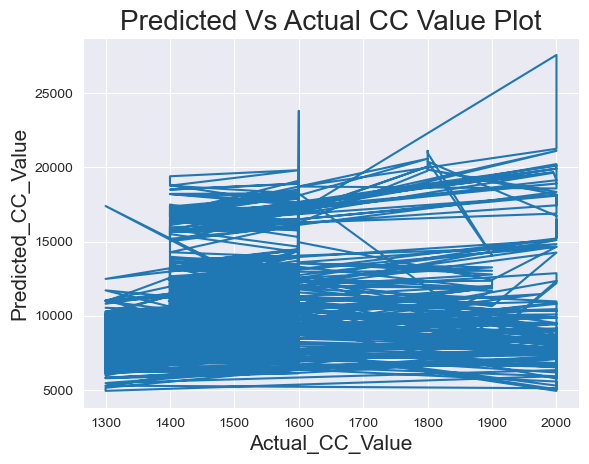

In [118]:
# Graph shows relation between Predicted and actual value
import matplotlib.pyplot as plt
df2.CC # Actual Value
pred_y   # Predicted Value
plt.plot(df2.CC,pred_y); plt.xlabel("Actual_CC_Value",size=15); plt.ylabel("Predicted_CC_Value",size = 15)
plt.title("Predicted Vs Actual CC Value Plot", size=20)
plt.show()